In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *

In [278]:
students_data = pd.read_table("data/food_coded.csv", sep=",")

In [279]:
students_data.shape

(125, 61)

In [12]:
students_data.nutritional_check.head()
# 1 - never 
# 2 - on certain products only 
# 3 - very rarely 
# 4 - on most products 
# 5 - on everything

0    5
1    4
2    4
3    2
4    3
Name: nutritional_check, dtype: int64

In [15]:
students_data.groupby("self_perception_weight").size()
# 6 - i dont think myself in these terms 
# 5 - overweight 
# 4 - slightly overweight 
# 3 - just right 
# 2 - very fit 
# 1 - slim 

self_perception_weight
1.0     6
2.0    31
3.0    45
4.0    31
5.0     6
6.0     5
dtype: int64

In [18]:
students_data.weight.unique()

array([187., 155.,  nan, 240., 190., 180., 137., 125., 116., 110., 264.,
       123., 185., 145., 170., 135., 165., 175., 195., 105., 160., 167.,
       115., 205., 128., 150., 140., 120., 100., 113., 168., 169., 200.,
       265., 192., 118., 210., 112., 144., 130., 127., 129., 260., 184.,
       230., 138., 156.])

In [17]:
# Clean blended values, non-numeric become NaN
students_data['weight'] = students_data['weight'].str.replace(r'[^\d\d\d]', '').replace('', np.nan).astype(float)

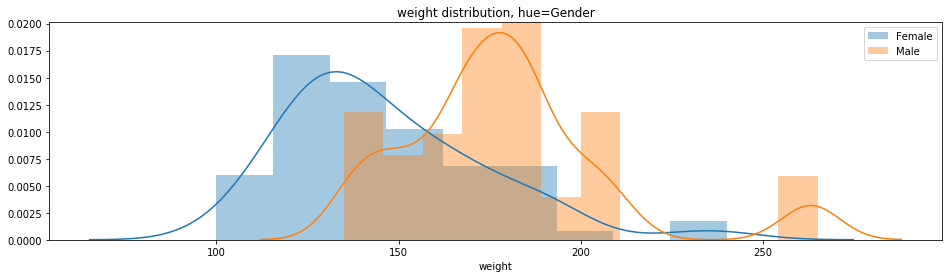

In [22]:
# Dict contains mean values of weights for both genders
weight_mean = {}
# Dict contains std values of weights for both genders
weight_std = {}

# Set plot size
fig, ax = plt.subplots(figsize=[16,4])

# Create two distributions for both genders
for gen, frame in students_data[['Gender', 'weight']].dropna().groupby('Gender'):
    weight_mean[gen] = frame['weight'].values.mean()
    weight_std[gen] = frame['weight'].values.std()
    sex_dict = {1: 0, 2: 1}
    sns.distplot(frame['weight'], ax=ax, label=['Female', 'Male'][sex_dict[gen]])

ax.set_title('weight distribution, hue=Gender')
ax.legend()

In [24]:
# Clean blended values, non-numeric become NaN
students_data['GPA'] = students_data['GPA'].str.replace(r'[^\d\.\d*]', '').replace('', np.nan).astype(float)

In [113]:
students_data['Gender'].unique()

array([2, 1], dtype=int64)

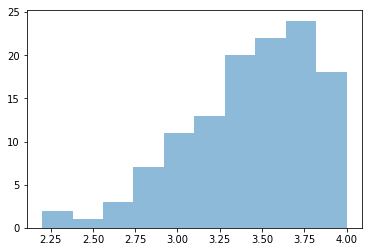

In [34]:
plt.hist(students_data["GPA"][students_data['GPA'].notnull()], alpha = 0.5)
# plt.plot(students_data["GPA"][students_data['GPA'].notnull()], alpha = 0.5)

plt.show()

In [79]:
interesting_corr = students_data[['GPA', 'Gender', 'breakfast', 'calories_day',
       'comfort_food_reasons_coded', 'cook', 'cuisine', 'diet_current_coded', 'drink',
       'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'fav_cuisine_coded', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day',
       'vitamins', 'waffle_calories', 'weight']].corr()

In [138]:
interesting_corr.nutritional_check.nlargest(10)

nutritional_check    1.000000
calories_day         0.364766
veggies_day          0.308464
greek_food           0.238772
fruit_day            0.208296
GPA                  0.131819
fries                0.125343
indian_food          0.122019
income               0.116226
ethnic_food          0.090182
Name: nutritional_check, dtype: float64

In [83]:
interesting_corr[interesting_corr > 0.4].count().sort_values(ascending = False)

ethnic_food                   5
thai_food                     5
greek_food                    5
persian_food                  5
indian_food                   5
tortilla_calories             3
weight                        2
life_rewarding                2
Gender                        2
exercise                      2
fruit_day                     2
waffle_calories               2
healthy_feeling               2
turkey_calories               2
sports                        2
veggies_day                   2
on_off_campus                 1
vitamins                      1
breakfast                     1
calories_day                  1
comfort_food_reasons_coded    1
cook                          1
cuisine                       1
diet_current_coded            1
drink                         1
eating_changes_coded          1
eating_changes_coded1         1
eating_out                    1
employment                    1
father_education              1
nutritional_check             1
fav_cuis

In [280]:
students_data.diet_current.unique()

array(['eat good and exercise',
       "I eat about three times a day with some snacks. I try to eat healthy but it doesn't always work out that- sometimes eat fast food and mainly eat at Laker/ Egan ",
       'toast and fruit for breakfast, salad for lunch, usually grilled chicken and veggies (or some variation) for dinner',
       'College diet, cheap and easy foods most nights. Weekends traditionally, cook better homemade meals  ',
       'I try to eat healthy but often struggle because of living on campus. I still try to keep the choices I do make balanced with fruits and vegetables and limit the sweats. ',
       "My current diet is terrible. I barely have time to eat a meal in a day. When i do eat it's mostly not healthy.",
       'I eat a lot of chicken and broccoli for dinner, and usually tuna sandwiches for lunch.',
       'I eat a very healthy diet. Ocassionally, i will eat out and get unhealthy food.',
       'I eat whatever I want in moderation.',
       "I eat healthy all 

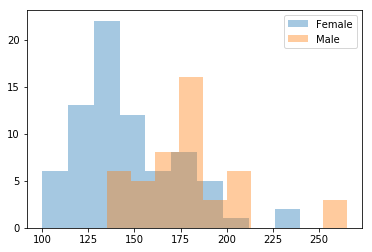

0.4945193388631658

In [140]:
students_weight = students_data[students_data["weight"].notnull()]

plt.hist(students_weight[students_weight.Gender == 1].weight, label = "Female", alpha = 0.4) # Female
plt.hist(students_weight[students_weight.Gender == 2].weight, label = "Male", alpha = 0.4) # Male
plt.legend()
plt.show()
(students_weight.weight).corr(students_weight.Gender)

In [144]:
students_data.groupby("breakfast").size()

breakfast
1    111
2     14
dtype: int64

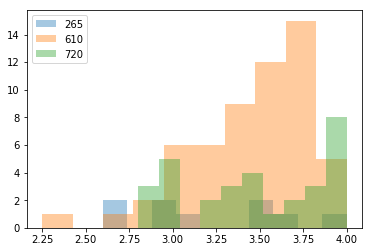

In [155]:
students_GPA = students_data[students_data["GPA"].notnull()]

plt.hist(students_GPA[students_GPA.calories_chicken == 265].GPA, label = "265", alpha = 0.4) # Female
# plt.hist(students_GPA[students_GPA.calories_chicken == 430].GPA, label = "430", alpha = 0.4) # Male
plt.hist(students_GPA[students_GPA.calories_chicken == 610].GPA, label = "610", alpha = 0.4) # Male
plt.hist(students_GPA[students_GPA.calories_chicken == 720].GPA, label = "720", alpha = 0.4) # Male

plt.legend()
plt.show()
# (students_weight.weight).corr(students_weight.Gender)

In [168]:
comfort_food = str(students_data.comfort_food.tolist())

In [176]:
words_counts = Counter(re.split("\\W+", comfort_food.lower()))
words_counts.most_common(25)


[('ice', 51),
 ('cream', 49),
 ('pizza', 40),
 ('and', 40),
 ('chocolate', 34),
 ('chips', 34),
 ('cheese', 23),
 ('cookies', 19),
 ('mac', 18),
 ('chicken', 14),
 ('fries', 11),
 ('candy', 10),
 ('pasta', 10),
 ('soup', 9),
 ('food', 8),
 ('french', 8),
 ('cake', 8),
 ('popcorn', 8),
 ('chinese', 8),
 ('pretzels', 5),
 ('fruit', 5),
 ('potatoes', 5),
 ('n', 5),
 ('butter', 5),
 ('snacks', 5)]

In [196]:
stops = set(stopwords.words("english"))
text_words = re.split("\\W+",  comfort_food.lower())
# [w for w in text_words if w not in stops]

to_chart = Counter([w for w in text_words if w not in stops]).most_common(15)

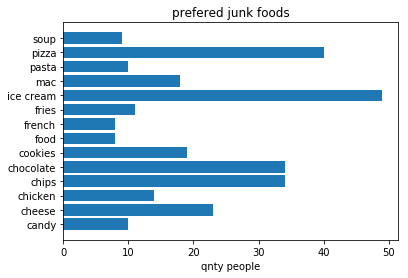

[('ice', 51),
 ('cream', 49),
 ('pizza', 40),
 ('chocolate', 34),
 ('chips', 34),
 ('cheese', 23)]

In [276]:
common_comfort_food = []
for i, g in to_chart:
    if i == "ice":
        continue
    else:
        if i == "cream":
            common_comfort_food.append(["ice cream", g])
        else:         
            common_comfort_food.append([i, g])
   
plt.barh(pd.DataFrame(common_comfort_food)[0], pd.DataFrame(common_comfort_food)[1])
plt.title("prefered junk foods")
plt.xlabel("qnty people")
plt.show()
Counter([w for w in text_words if w not in stops]).most_common(6)